In [26]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

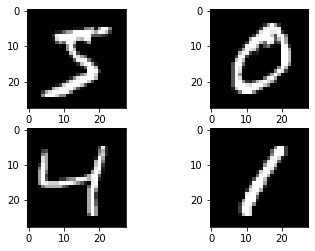

In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( "gray" ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( "gray" ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( "gray" ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( "gray" ))
# show the plot
plt.show()

In [3]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( "float32" )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( "float32" )

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
print(num_pixels)

784


# Modelo de referencia con perceptores multicapa

In [7]:
#simple model 
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= "normal" , activation= "relu" ))
    model.add(Dense(num_classes, kernel_initializer= "normal" , activation= "softmax" ))
    # Compile model
    model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "accuracy" ])
    return model

<img src="img/cap19.png" height="600px" width="400px" />



In [8]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.2508 - accuracy: 0.9270 - val_loss: 0.1411 - val_accuracy: 0.9581
Epoch 2/10
 - 1s - loss: 0.1151 - accuracy: 0.9675 - val_loss: 0.1056 - val_accuracy: 0.9673
Epoch 3/10
 - 1s - loss: 0.0842 - accuracy: 0.9763 - val_loss: 0.0874 - val_accuracy: 0.9739
Epoch 4/10
 - 1s - loss: 0.0665 - accuracy: 0.9818 - val_loss: 0.0808 - val_accuracy: 0.9777
Epoch 5/10
 - 1s - loss: 0.0544 - accuracy: 0.9855 - val_loss: 0.0721 - val_accuracy: 0.9793
Epoch 6/10
 - 1s - loss: 0.0448 - accuracy: 0.9883 - val_loss: 0.0714 - val_accuracy: 0.9786
Epoch 7/10
 - 1s - loss: 0.0382 - accuracy: 0.9905 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 8/10
 - 1s - loss: 0.0319 - accuracy: 0.9925 - val_loss: 0.0632 - val_accuracy: 0.9814
Epoch 9/10
 - 1s - loss: 0.0270 - accuracy: 0.9940 - val_loss: 0.0610 - val_accuracy: 0.9809
Epoch 10/10
 - 1s - loss: 0.0232 - accuracy: 0.9954 - val_loss: 0.0601 - val_accuracy: 0.9808
Baseline Error: 1.9

# Red neuronal convolucional simple 

In [27]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
# load data
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( "float32" )
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( "float32" )

In [30]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
# define a simple CNN model
# padding== border_mode==valid por defecto 
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(1,28, 28), activation= "relu",data_format="channels_first" ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= "relu" ))
    model.add(Dense(num_classes, activation= "softmax" ))
    # Compile model
    model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "accuracy" ])
    return model

<img src="img/cnnlarga.png" height="600px" width="400px" />

In [15]:
# build the model
model_cnn = cnn_model()
# Fit the model
model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores_cnn[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2125 - accuracy: 0.9373 - val_loss: 0.0833 - val_accuracy: 0.9751
Epoch 2/10
 - 1s - loss: 0.0721 - accuracy: 0.9786 - val_loss: 0.0511 - val_accuracy: 0.9844
Epoch 3/10
 - 2s - loss: 0.0525 - accuracy: 0.9845 - val_loss: 0.0422 - val_accuracy: 0.9866
Epoch 4/10
 - 1s - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0397 - val_accuracy: 0.9871
Epoch 5/10
 - 1s - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0366 - val_accuracy: 0.9880
Epoch 6/10
 - 2s - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.0333 - val_accuracy: 0.9890
Epoch 7/10
 - 1s - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0350 - val_accuracy: 0.9878
Epoch 8/10
 - 1s - loss: 0.0258 - accuracy: 0.9924 - val_loss: 0.0334 - val_accuracy: 0.9885
Epoch 9/10
 - 2s - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0310 - val_accuracy: 0.9893
Epoch 10/10
 - 1s - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0349 - val_accuracy: 0.9881
CNN Error: 1.19%


# Red neuronal convolucional larga

In [31]:
#"channels_first" (formerly "th")
#"channels_last" (formerly "tf").
#investigar para que sirve:
#set_image_data_format("channels_first")==Conv2D(input_shape=(1,...), data_format="channels_first" )
from tensorflow.keras import backend as K
K.set_image_data_format("channels_first")

<img src="img/cnnsimple.png" height="600px" width="400px" />

In [34]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation= "relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation= "relu" ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= "relu" ))
    model.add(Dense(50, activation= "relu" ))
    model.add(Dense(num_classes, activation= "softmax" ))
    # Compile model
    model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "accuracy" ])
    return model

In [35]:
# build the model
model_cnn_l = larger_model()
# Fit the model
model_cnn_l.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,verbose=2)
# Final evaluation of the model
scores = model_cnn_l.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.3384 - accuracy: 0.8939 - val_loss: 0.0832 - val_accuracy: 0.9760
Epoch 2/10
 - 1s - loss: 0.0998 - accuracy: 0.9693 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 3/10
 - 1s - loss: 0.0728 - accuracy: 0.9773 - val_loss: 0.0459 - val_accuracy: 0.9855
Epoch 4/10
 - 1s - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 5/10
 - 1s - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0340 - val_accuracy: 0.9882
Epoch 6/10
 - 1s - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0287 - val_accuracy: 0.9912
Epoch 7/10
 - 1s - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0314 - val_accuracy: 0.9889
Epoch 8/10
 - 1s - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0285 - val_accuracy: 0.9909
Epoch 9/10
 - 1s - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0271 - val_accuracy: 0.9904
Epoch 10/10
 - 1s - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0277 - val_accuracy: 0.9906
Large CNN Error: 0.

<img src="img/meme.jpg" height="600px" width="400px" />